Iniciando em Panda

link: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#selection


In [0]:
import pandas as pd 
import numpy as np 

In [2]:
s = pd.Series([1,3,5,np.nan,7,9])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    7.0
5    9.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.613013,-0.703951,-1.413245,0.171354
2013-01-02,-2.220087,1.075016,-0.355342,-0.883552
2013-01-03,0.566926,-0.396241,0.491241,0.994158
2013-01-04,0.330726,-0.714073,-0.886493,-0.657978
2013-01-05,1.345374,0.442117,-1.375525,0.173745
2013-01-06,-0.436500,-1.257312,0.063164,0.975545


Creating a DataFrame by passing a dict of objectos that can be converted to series-like

In [5]:
df2 = pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20130101'),
                    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D':np.array([3]*4,dtype='int32'),
                    'E':pd.Categorical(["test",'train','test','train']),
                    'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-01,1.0,3,train,foo
2,1.0,2013-01-01,1.0,3,test,foo
3,1.0,2013-01-01,1.0,3,train,foo


The Columns of the resulting DataFrame have different dtypes

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# **Viewing Data** 

How to view the top and bottom rows of the frame

In [0]:
df.head()

,A,B,C,D
2013-01-01,0.194356,-1.667613,-0.967954,0.205058
2013-01-02,1.058001,-1.029062,-1.004347,-0.243045
2013-01-03,-0.140736,1.198015,-1.916979,0.527761
2013-01-04,-2.199339,-0.206689,1.031557,0.949772
2013-01-05,0.334452,-1.196020,1.480928,0.189805


Display the index, columns

In [0]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

 **DataFrame.to_numpy() ** gives a NumPy representation of underlying data.

In [0]:
df.to_numpy()

array([[-1.39912357,  0.08917181,  0.84251632,  1.22279932],
       [ 0.35557354, -1.39445787,  1.11000818, -0.9350608 ],
       [-0.1729747 ,  1.56390111, -0.36581915, -1.4884057 ],
       [-0.59753131,  0.52124486,  0.68799967,  1.71694617],
       [-0.99920578,  0.1676267 ,  0.71249925, -1.40545819],
       [ 3.26232573, -0.13694317,  0.72766383,  1.04950221]])

In [0]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-01 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-01 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

df.describe() shows a quick statistic summary of your data

mostra um breve resumo de seus dados.


In [0]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.074844,0.135091,0.619145,0.026721
std,1.678006,0.959927,0.507194,1.456387
min,-1.399124,-1.394458,-0.365819,-1.488406
25%,-0.898787,-0.080414,0.694125,-1.287859
50%,-0.385253,0.128399,0.720082,0.057221
75%,0.223436,0.432840,0.813803,1.179475
max,3.262326,1.563901,1.110008,1.716946


Transposing your data

In [0]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.399124,0.355574,-0.172975,-0.597531,-0.999206,3.262326
B,0.089172,-1.394458,1.563901,0.521245,0.167627,-0.136943
C,0.842516,1.110008,-0.365819,0.688000,0.712499,0.727664
D,1.222799,-0.935061,-1.488406,1.716946,-1.405458,1.049502


Sorting by an axis

In [0]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.222799,0.842516,0.089172,-1.399124
2013-01-02,-0.935061,1.110008,-1.394458,0.355574
2013-01-03,-1.488406,-0.365819,1.563901,-0.172975
2013-01-04,1.716946,0.688000,0.521245,-0.597531
2013-01-05,-1.405458,0.712499,0.167627,-0.999206
2013-01-06,1.049502,0.727664,-0.136943,3.262326


Sorting by values 


In [0]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,0.355574,-1.394458,1.110008,-0.935061
2013-01-06,3.262326,-0.136943,0.727664,1.049502
2013-01-01,-1.399124,0.089172,0.842516,1.222799
2013-01-05,-0.999206,0.167627,0.712499,-1.405458
2013-01-04,-0.597531,0.521245,0.688000,1.716946
2013-01-03,-0.172975,1.563901,-0.365819,-1.488406


# Selection 


# Getting 


Selecting a single column,

In [0]:
df['A']

2013-01-01   -1.399124
2013-01-02    0.355574
2013-01-03   -0.172975
2013-01-04   -0.597531
2013-01-05   -0.999206
2013-01-06    3.262326
Freq: D, Name: A, dtype: float64

Selecting via []. which slices the rows

In [0]:
df[0:3]

,A,B,C,D
2013-01-01,-1.399124,0.089172,0.842516,1.222799
2013-01-02,0.355574,-1.394458,1.110008,-0.935061
2013-01-03,-0.172975,1.563901,-0.365819,-1.488406


In [0]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.355574,-1.394458,1.110008,-0.935061
2013-01-03,-0.172975,1.563901,-0.365819,-1.488406
2013-01-04,-0.597531,0.521245,0.688000,1.716946


# Selection by label


for getting a cross section using a label

In [0]:
df.loc[dates[0]]

A   -1.399124
B    0.089172
C    0.842516
D    1.222799
Name: 2013-01-01 00:00:00, dtype: float64

Selection on a multi-axis by label

In [0]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.399124,0.089172
2013-01-02,0.355574,-1.394458
2013-01-03,-0.172975,1.563901
2013-01-04,-0.597531,0.521245
2013-01-05,-0.999206,0.167627
2013-01-06,3.262326,-0.136943


Showing label slicing, both endpoints are included

In [0]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.355574,-1.394458
2013-01-03,-0.172975,1.563901
2013-01-04,-0.597531,0.521245


Reduction in the dimensions of the returned object

In [0]:
df.loc['20130102',['A','B']]

A    0.355574
B   -1.394458
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [0]:
df.loc[dates[0],'A']

-1.3991235739934782

# **Selection by position**

select via the position of the passed intergers

In [0]:
df.iloc[3]

A   -0.597531
B    0.521245
C    0.688000
D    1.716946
Name: 2013-01-04 00:00:00, dtype: float64

by integer slices, acting similar to numpy/python

In [0]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.597531,0.521245
2013-01-05,-0.999206,0.167627


# **Boolean indexing**

Using a single column's values to select data

In [0]:
df[df['A']>0]

,A,B,C,D
2013-01-02,0.355574,-1.394458,1.110008,-0.935061
2013-01-06,3.262326,-0.136943,0.727664,1.049502


Using the **isin()** method for filtering

In [0]:
df2 = df.copy()
df2['E'] = ['one','one','two','three','four','three']
df2


df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.172975,1.563901,-0.365819,-1.488406,two
2013-01-05,-0.999206,0.167627,0.712499,-1.405458,four


# **Setting**

Setting a new column automatially aligns the data by indexes

In [0]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

df['F'] = s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label:

In [0]:
df.at[dates[0],'A'] = 0

Setting values by position 

In [0]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [0]:
df.loc[:,'D'] = np.array([5]*len(df))

THe result of the prior operations 

In [0]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.967954,5
2013-01-02,1.058001,-1.029062,-1.004347,5
2013-01-03,-0.140736,1.198015,-1.916979,5
2013-01-04,-2.199339,-0.206689,1.031557,5
2013-01-05,0.334452,-1.196020,1.480928,5
2013-01-06,-0.041747,-1.117834,-0.104326,5


# **Missing Data**

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.


In [0]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']= 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.967954,5,1.0
2013-01-02,1.058001,-1.029062,-1.004347,5,1.0
2013-01-03,-0.140736,1.198015,-1.916979,5,NaN
2013-01-04,-2.199339,-0.206689,1.031557,5,NaN


To Drop any rows that have missing data

In [0]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.967954,5,1.0
2013-01-02,1.058001,-1.029062,-1.004347,5,1.0


Filling missing data

In [0]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.967954,5,1.0
2013-01-02,1.058001,-1.029062,-1.004347,5,1.0
2013-01-03,-0.140736,1.198015,-1.916979,5,5.0
2013-01-04,-2.199339,-0.206689,1.031557,5,5.0


to get the boolean mask where values are nan

In [0]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


# **Operations**

**Stats**

Operations in general exclude missing data.
Performing a descriptive statistic

In [0]:
df.mean()

A   -0.164895
B   -0.391932
C   -0.246854
D    5.000000
dtype: float64

Same operation on the other axis

In [0]:
df.mean(1)

2013-01-01    1.008011
2013-01-02    1.006148
2013-01-03    1.035075
2013-01-04    0.906382
2013-01-05    1.404840
2013-01-06    0.934023
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension

In [0]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [0]:
df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.140736,0.198015,-2.916979,4.0
2013-01-04,-5.199339,-3.206689,-1.968443,2.0
2013-01-05,-4.665548,-6.196020,-3.519072,0.0
2013-01-06,NaN,NaN,NaN,NaN


# **Apply**
Applying functions to the data:

In [0]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.967954,5
2013-01-02,1.058001,-1.029062,-1.972301,10
2013-01-03,0.917265,0.168954,-3.889281,15
2013-01-04,-1.282074,-0.037735,-2.857723,20
2013-01-05,-0.947622,-1.233755,-1.376796,25
2013-01-06,-0.989370,-2.351589,-1.481122,30


In [0]:
df.apply(lambda x: x.max() - x.min())

A    3.257340
B    2.394035
C    3.397907
D    0.000000
dtype: float64

# **Plotting**

we use the standard convetions for referencing the matplotlib API



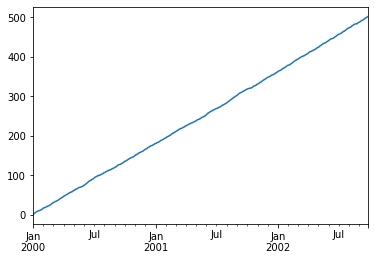

In [0]:
import matplotlib.pyplot as plt
plt.close('all')

ts = pd.Series(np.random.rand(1000),index=pd.date_range('1/1/2000',periods=1000))
ts = ts.cumsum()
ts.plot()

# **Essential Basic Funcionality**

Here we discuss a lot of the essential functionatily common to the pandas data structures. Here´s how to create some of the objects.

Link :https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html

In [0]:
index = pd.date_range('1/1/2000',periods=8)

s = pd.Series(np.random.randn(5),index=['a','b','c','d','e'])

df = pd.DataFrame(np.random.randn(8,3),index=index,columns=['A','B','C'])

**Head and Tail**

To view a small sample of Series of DataFrame object, use the head() and tail() methods. The default number of elements to display is five, but you maypass a custom number

In [10]:
longo_series = pd.Series(np.random.randn(1000))
longo_series.head()

0   -0.222663
1    0.086294
2   -0.144096
3   -0.804351
4   -0.263907
dtype: float64

In [12]:
longo_series.tail(3)

997   -0.871960
998   -0.431146
999   -0.167287
dtype: float64

**Attributes and underlying data**

pandas objects have a number of attributes enabling you to acess the metadata 
*  **shape**: gives the axis dimensions of the object, consistente with ndarray
*  **Axis labels**
  * **Series**: index( only axis)
  * **DataFrame**: index(rows) and columns

In [13]:
df[:2]

,A,B,C
2000-01-01,-0.498278,0.301399,1.565398
2000-01-02,-0.994782,-0.588336,-1.091882


In [14]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,-0.498278,0.301399,1.565398
2000-01-02,-0.994782,-0.588336,-1.091882
2000-01-03,0.964900,-1.205855,0.658047
2000-01-04,-0.497685,1.480609,-0.170156
2000-01-05,0.537257,-0.366085,0.549761
2000-01-06,-1.227483,-1.219792,-0.528038
2000-01-07,-0.181707,-2.223836,-0.350431
2000-01-08,-0.879816,1.180868,0.495590
